# IMPORT REQUIRED LIBRARIES 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING DATASET

In [2]:
data=pd.read_csv("cell_samples.csv")

In [3]:
data.tail()
data.shape
data.size
data.count()
data["Class"].value_counts()


2    458
4    241
Name: Class, dtype: int64

## EPLORATORY  DATA ANALYSIS

In [4]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [5]:
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
data=data[pd.to_numeric(data["BareNuc"],errors="coerce").notnull()]
data["BareNuc"]=data["BareNuc"].astype("int")

<ipython-input-6-9e3ef6a098fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BareNuc"]=data["BareNuc"].astype("int")


In [7]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
data.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [10]:

print(data.head())
print(data.info())
print(data.describe())


        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  \
0  1000025      5         1          1        1            2        1   
1  1002945      5         4          4        5            7       10   
2  1015425      3         1          1        1            2        2   
3  1016277      6         8          8        1            3        4   
4  1017023      4         1          1        3            2        1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-nu

<AxesSubplot:>

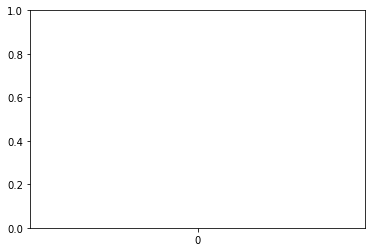

In [11]:
sns.boxplot()


<Figure size 792x576 with 0 Axes>

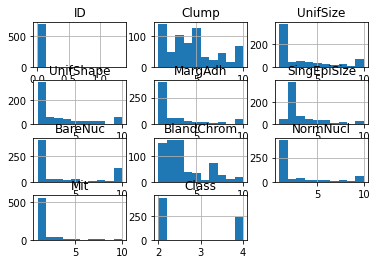

In [12]:
plt.figure(figsize=(11,8))
data.hist()
plt.show()


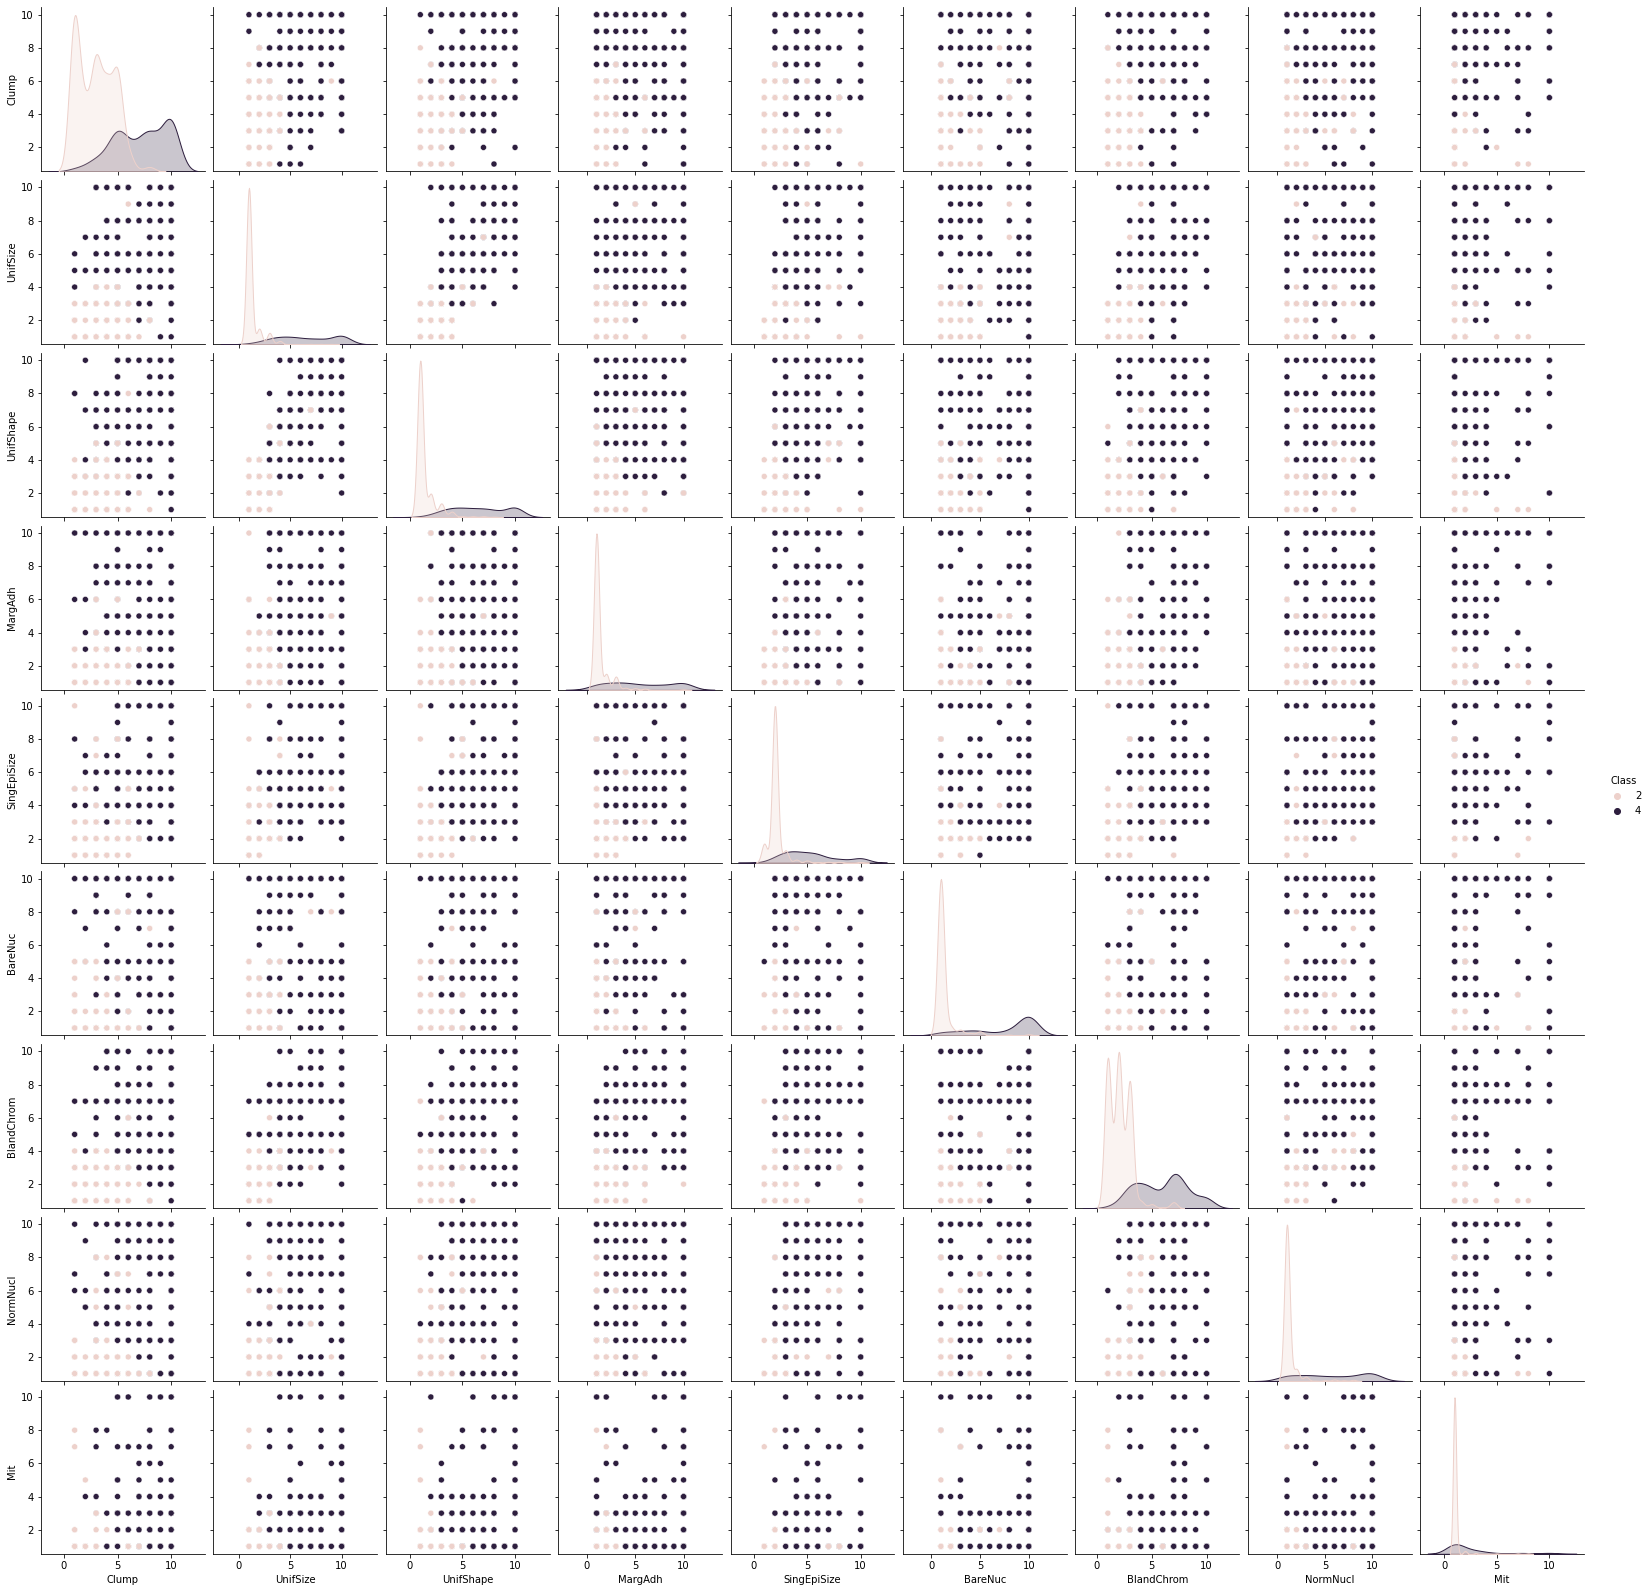

In [13]:
sns.pairplot(data, vars=['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit'], hue='Class')



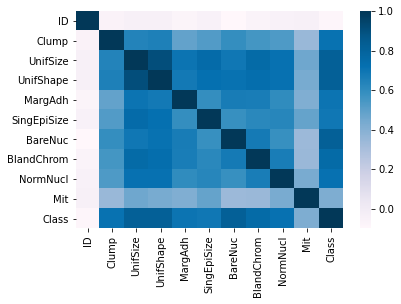

In [14]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='PuBu')
plt.show()


<AxesSubplot:xlabel='UnifSize', ylabel='Clump'>

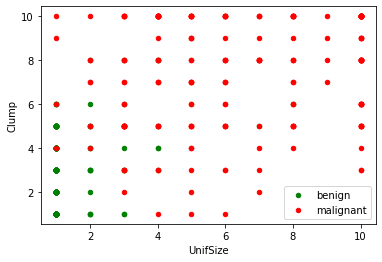

In [15]:
benign=data[data["Class"]==2][0:200]
mailgnant=data[data["Class"]==4][0:200]
axis=benign.plot.scatter(y="Clump",x="UnifSize",color="green",label="benign")
mailgnant.plot.scatter(y="Clump",x="UnifSize",color="red",label="malignant",ax=axis)

## selecting features and target

In [16]:
data.columns
features=data[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(features)
y=np.asarray(data["Class"])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [17]:
 
x[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [18]:
features.shape

(683, 9)

In [19]:
x.shape

(683, 9)

In [20]:
y.shape

(683,)

#  training and testing 

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4998,  random_state=1)

In [22]:

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [23]:
classifier = svm.SVC(kernel="linear",gamma="auto",C=2 )
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


## Results 

In [24]:
y_test

array([2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4,

In [25]:
y_pred.shape

(342,)

In [26]:
y_train.shape

(341,)

In [27]:
classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n           2       0.98      0.97      0.98       220\n           4       0.95      0.97      0.96       122\n\n    accuracy                           0.97       342\n   macro avg       0.97      0.97      0.97       342\nweighted avg       0.97      0.97      0.97       342\n'

In [28]:
import matplotlib.pyplot as plt


ValueError: x and y must have same first dimension, but have shapes (342,) and (341,)

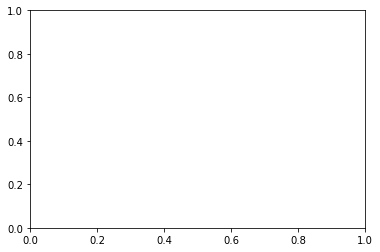

In [29]:
plt.plot(y_test,y_train) # unable to predict because dimensional data imbalance
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

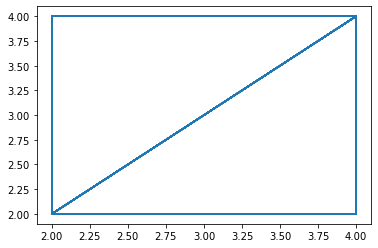

In [30]:
plt.plot(y_test,y_pred) # unable to predict because data imbalance
plt.show